<a href="https://colab.research.google.com/github/BrandyTee/My-ML-Projects/blob/main/Copy_of_Barcelona_vs_PSG_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
pd.options.display.max_columns = 100

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Load The Data
leagues = {"SP1":"LaLiga", "F1":"Ligue1"}

seasons = ["2122", "2223", "2324", "2425", "2526"]

for season in seasons:
    for code, league in leagues.items():
        url = f"https://www.football-data.co.uk/mmz4281/{season}/{code}.csv"
        df = pd.read_csv(url)
        df.to_csv(f"{league}_{season}.csv")
        print("Downloaded")

Downloaded
Downloaded
Downloaded
Downloaded
Downloaded
Downloaded
Downloaded
Downloaded
Downloaded
Downloaded


In [ ]:
sp22 = pd.read_csv("/content/LaLiga_2122.csv")
sp23 = pd.read_csv("/content/LaLiga_2223.csv")
sp24 = pd.read_csv("/content/LaLiga_2324.csv")
sp25 = pd.read_csv("/content/LaLiga_2425.csv")
sp26 = pd.read_csv("/content/LaLiga_2526.csv")
l22 = pd.read_csv("/content/Ligue1_2122.csv")
l23 = pd.read_csv("/content/Ligue1_2223.csv")
l24 = pd.read_csv("/content/Ligue1_2324.csv")
l25 = pd.read_csv("/content/Ligue1_2425.csv")
l26 = pd.read_csv("/content/Ligue1_2526.csv")

In [ ]:
#Merge Our Data
df = pd.concat([sp26,sp25,sp24,sp23,sp22, l26,l25,l24,l23,l22])
df.head()

,Unnamed: 0,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BFDH,BFDD,BFDA,BMGMH,BMGMD,BMGMA,BVH,BVD,BVA,BWH,BWD,BWA,CLH,CLD,CLA,LBH,LBD,LBA,PSH,PSD,PSA,MaxH,MaxD,...,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,BFEC>2.5,BFEC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA,BFH,BFD,BFA,WHH,WHD,WHA,1XBH,1XBD,1XBA,BFCH,BFCD,BFCA,WHCH,WHCD,WHCA,1XBCH,1XBCD,1XBCA,IWH,IWD,IWA,VCH,VCD,VCA,IWCH,IWCD,IWCA,VCCH,VCCD,VCCA
0,0,SP1,15/08/2025,18:00,Girona,Vallecano,1,3,A,0,3,A,7,16,2,5,8,17,2,4,0,1,1,0,2.25,3.25,3.3,2.3,3.20,3.25,2.17,3.25,3.25,2.25,3.30,3.25,2.25,3.25,3.25,2.25,3.3,3.25,2.25,3.25,3.20,2.30,3.30,3.45,2.30,3.33,...,1.67,2.24,1.72,2.22,1.68,2.17,1.66,2.36,1.72,-0.25,2.1,1.78,1.97,1.95,2.10,1.80,1.95,1.75,2.11,1.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,SP1,15/08/2025,20:30,Villarreal,Oviedo,2,0,H,2,0,H,25,5,10,4,10,8,10,1,1,2,0,1,1.40,4.75,8.0,1.4,4.50,8.50,1.34,5.00,7.50,1.36,4.75,8.50,1.40,4.60,8.00,1.40,4.6,8.00,1.40,4.60,8.00,1.41,4.76,8.80,1.40,5.10,...,2.03,1.85,2.06,1.89,2.03,1.82,1.94,1.90,2.06,-1.25,1.9,1.95,1.93,2.00,1.94,1.96,1.82,1.87,1.96,2.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,SP1,16/08/2025,18:30,Mallorca,Barcelona,0,3,A,0,2,A,4,24,1,8,8,17,3,6,4,1,2,0,7.00,5.00,1.4,7.0,4.60,1.44,7.00,4.90,1.38,7.00,4.60,1.44,6.50,4.75,1.46,6.50,4.6,1.44,6.50,4.60,1.44,6.68,5.03,1.45,7.00,5.00,...,2.75,1.50,2.71,1.47,2.90,1.43,2.72,1.49,2.98,1.50,2.0,1.85,1.88,2.05,2.00,1.93,1.90,1.86,2.04,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,SP1,16/08/2025,20:30,Alaves,Levante,2,1,H,1,0,H,15,7,4,3,15,13,10,1,0,1,0,0,2.15,3.00,3.8,2.2,3.00,3.75,2.16,3.05,3.55,2.15,3.10,3.70,2.25,3.00,3.50,2.25,3.0,3.50,2.25,3.00,3.50,2.18,3.18,3.84,2.25,3.10,...,1.50,2.54,1.57,2.63,1.54,2.51,1.50,2.66,1.59,-0.25,1.8,2.05,1.86,2.07,1.80,2.07,1.70,2.00,1.81,2.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,SP1,16/08/2025,20:30,Valencia,Sociedad,1,1,D,0,0,D,18,13,2,3,5,11,8,7,1,2,0,0,2.60,2.90,3.1,2.5,2.88,3.20,2.50,2.85,3.00,2.55,2.90,3.10,2.55,2.95,3.00,2.60,3.0,3.00,2.50,2.90,3.00,2.65,2.89,3.23,2.60,3.00,...,1.50,2.55,1.56,2.63,1.55,2.49,1.51,2.68,1.57,-0.25,2.1,1.78,2.13,1.81,2.10,1.78,1.96,1.74,2.18,1.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.iloc[:, 4:25].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3015 entries, 0 to 379
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HomeTeam  3015 non-null   object 
 1   AwayTeam  3015 non-null   object 
 2   FTHG      3015 non-null   int64  
 3   FTAG      3015 non-null   int64  
 4   FTR       3015 non-null   object 
 5   HTHG      3015 non-null   int64  
 6   HTAG      3015 non-null   int64  
 7   HTR       3015 non-null   object 
 8   HS        3015 non-null   int64  
 9   AS        3015 non-null   int64  
 10  HST       3015 non-null   int64  
 11  AST       3015 non-null   int64  
 12  HF        3015 non-null   int64  
 13  AF        3015 non-null   int64  
 14  HC        3015 non-null   int64  
 15  AC        3015 non-null   int64  
 16  HY        3015 non-null   int64  
 17  AY        3015 non-null   int64  
 18  HR        3015 non-null   int64  
 19  AR        3015 non-null   int64  
 20  B365H     3015 non-null   float64
dt

In [ ]:
data = df.iloc[:, 4:24]

In [ ]:
data.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
375,Lorient,Troyes,1,1,D,0,1,A,17,8,6,3,18,10,6,4,2,2,0,1
376,Marseille,Strasbourg,4,0,H,1,0,H,17,10,11,4,11,16,7,3,2,1,0,0
377,Nantes,St Etienne,1,1,D,1,0,H,12,13,5,3,8,9,5,5,2,0,0,0
378,Paris SG,Metz,5,0,H,3,0,H,27,4,12,1,7,12,4,2,1,2,0,1
379,Reims,Nice,2,3,A,2,0,H,5,17,4,6,8,14,2,7,0,2,0,0


In [ ]:
#Remove all matches without Barcelona or PSG

team1 = "Barcelona"
team2 = "Paris SG"

clubs = [team1, team2]

new_data = data[(data["HomeTeam"].isin(clubs) | data["AwayTeam"].isin(clubs))]

In [ ]:
new_data

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
2,Mallorca,Barcelona,0,3,A,0,2,A,4,24,1,8,8,17,3,6,4,1,2,0
13,Levante,Barcelona,2,3,A,2,0,H,8,26,5,10,10,8,0,11,3,1,0,0
30,Vallecano,Barcelona,1,1,D,0,1,A,12,12,6,3,16,8,9,4,4,1,0,0
39,Barcelona,Valencia,6,0,H,1,0,H,24,2,10,1,9,8,5,4,0,1,0,0
50,Barcelona,Getafe,3,0,H,2,0,H,16,3,7,2,9,15,3,2,2,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,Paris SG,Lens,1,1,D,0,0,D,18,8,7,3,17,12,4,3,4,2,0,1
340,Strasbourg,Paris SG,3,3,D,1,1,D,14,14,2,6,15,6,2,5,3,3,0,0
357,Paris SG,Troyes,2,2,D,2,1,H,17,9,7,3,10,19,7,4,1,2,0,0
364,Montpellier,Paris SG,0,4,A,0,3,A,10,15,3,9,9,7,0,2,2,4,0,0


In [ ]:
#Get The average of the teams for the past 6 games

cols = ["HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC", "HY", "AY", "HR", "AR"]


def get_averages(home, away, df, games=10):
    #Get Club Matches
    club_matches = df[(df["HomeTeam"] == home) | (df["AwayTeam"] == away)]

    #Get last n games
    club_matches = club_matches.tail(games)

    #Get averages
    return club_matches[cols].mean().values

In [ ]:
get_averages(team1, team2, new_data)

array([11.7, 14.8,  4.5,  6.4, 12.8,  9. ,  3.3,  5.5,  1.8,  2.5,  0. ,
        0.2])

In [ ]:
#Drop Some Features We Don't Want
new_data = new_data.drop(["HTR", "HTAG", "HTHG", "FTAG", "FTHG"],
axis=1
)

In [ ]:
new_data.head()

,HomeTeam,AwayTeam,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
2,Mallorca,Barcelona,A,4,24,1,8,8,17,3,6,4,1,2,0
13,Levante,Barcelona,A,8,26,5,10,10,8,0,11,3,1,0,0
30,Vallecano,Barcelona,D,12,12,6,3,16,8,9,4,4,1,0,0
39,Barcelona,Valencia,H,24,2,10,1,9,8,5,4,0,1,0,0
50,Barcelona,Getafe,H,16,3,7,2,9,15,3,2,2,4,0,0


In [ ]:
#Let's turn our FTR Into Numerical
new_data.replace(
{"FTR": {"A":0, "H":1, "D":2}},
inplace=True)

/tmp/ipython-input-1755067097.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data.replace(


In [ ]:
new_data

,HomeTeam,AwayTeam,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
2,Mallorca,Barcelona,0,4,24,1,8,8,17,3,6,4,1,2,0
13,Levante,Barcelona,0,8,26,5,10,10,8,0,11,3,1,0,0
30,Vallecano,Barcelona,2,12,12,6,3,16,8,9,4,4,1,0,0
39,Barcelona,Valencia,1,24,2,10,1,9,8,5,4,0,1,0,0
50,Barcelona,Getafe,1,16,3,7,2,9,15,3,2,2,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,Paris SG,Lens,2,18,8,7,3,17,12,4,3,4,2,0,1
340,Strasbourg,Paris SG,2,14,14,2,6,15,6,2,5,3,3,0,0
357,Paris SG,Troyes,2,17,9,7,3,10,19,7,4,1,2,0,0
364,Montpellier,Paris SG,0,10,15,3,9,9,7,0,2,2,4,0,0


In [ ]:
#Let's Separate Our Data
X = new_data.drop("FTR", axis=1)
Y = new_data["FTR"]

In [ ]:
#Label Encoding
encoder = LabelEncoder()

features = ["HomeTeam", "AwayTeam"]

for feature in features:
    X[feature] = encoder.fit_transform(X[feature])

In [ ]:
#Let's Turn Our Clubs Into Categories
#Into Numerical Values

#hot_encoder = OneHotEncoder()
#features = ["HomeTeam", "AwayTeam"]

#for feature in features:
#encoded = hot_encoder.fit_transform(X[features])

#Turn It To Dataframe
#encoded_df = pd.DataFrame(encoded.toarray(), columns=hot_encoder.get_feature_names_out(features))

#Remove the original HomeTeam and AwayTeam
#X = X.drop(["HomeTeam", "AwayTeam"], axis=1)

#Concatenate the new values
#X = pd.concat([X.reset_index(drop=True), encoded_df], axis=1)

In [ ]:
X

,HomeTeam,AwayTeam,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
2,27,7,4,24,1,8,8,17,3,6,4,1,2,0
13,23,7,8,26,5,10,10,8,0,11,3,1,0,0
30,48,7,12,12,6,3,16,8,9,4,4,1,0,0
39,7,45,24,2,10,1,9,8,5,4,0,1,0,0
50,7,16,16,3,7,2,9,15,3,2,2,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,36,22,18,8,7,3,17,12,4,3,4,2,0,1
340,43,35,14,14,2,6,15,6,2,5,3,3,0,0
357,36,44,17,9,7,3,10,19,7,4,1,2,0,0
364,31,35,10,15,3,9,9,7,0,2,2,4,0,0


In [ ]:
#Barcelona = 7
#PSG = 36/35

In [ ]:
#Train_split
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.15, random_state=3
)

In [ ]:
#Model Function
def model_function(model):
    #Train
    model.fit(X_train, y_train)

    #Predict
    pred = model.predict(X_test)

    #Get Accuracy
    accuracy = accuracy_score(y_test, pred)
    matrix = confusion_matrix(y_test, pred)

    #Print Accuracy
    print(f"Accuracy: {round((accuracy * 100), 2)}%")
    sns.heatmap(matrix, annot=True, cmap="Greens")
    plt.show()

Accuracy: 57.45%


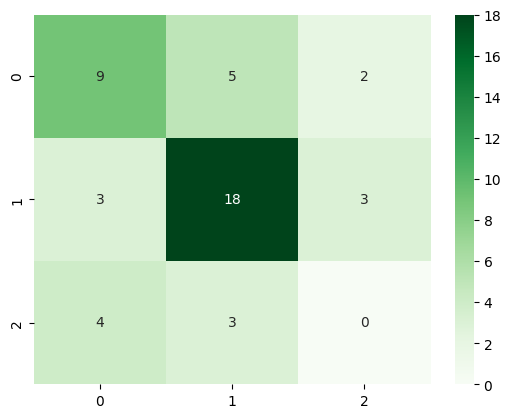

In [ ]:
tree = DecisionTreeClassifier(max_depth=6)
model_function(tree)

Accuracy: 68.09%


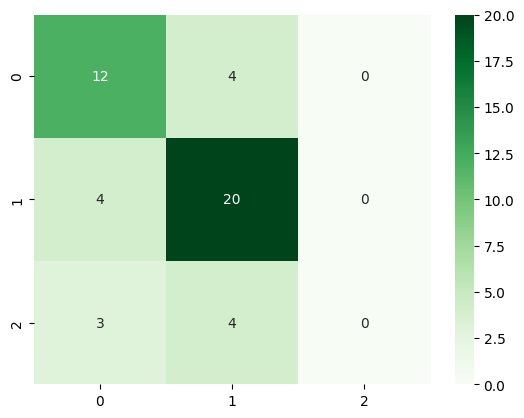

In [ ]:
trees = ExtraTreesClassifier()
model_function(trees)

Accuracy: 70.21%


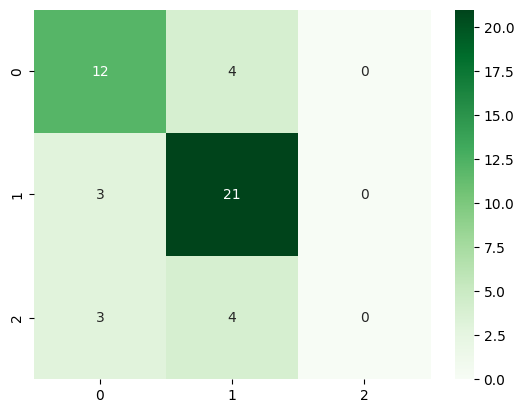

In [ ]:
forest = RandomForestClassifier()
model_function(forest)

Accuracy: 55.32%


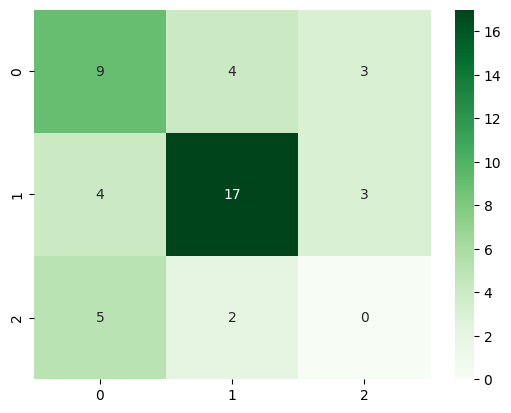

In [ ]:
boost = AdaBoostClassifier(tree, learning_rate=0.01, n_estimators=150)
model_function(boost)

Accuracy: 59.57%


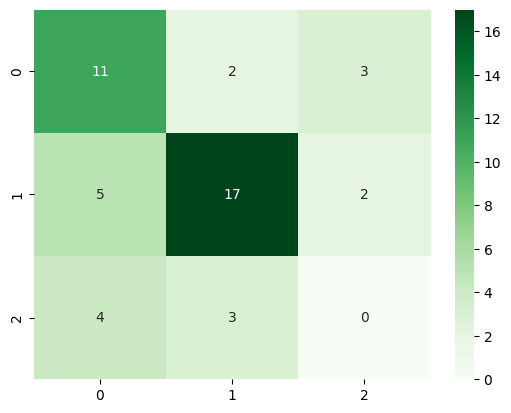

In [ ]:
xgb = XGBClassifier()
model_function(xgb)

In [ ]:
#We'll Use The Random Forest Classifier
#Save It
joblib.dump(forest, "Barça_PSG.joblib")

['Barça_PSG.joblib']

In [ ]:
my_model = joblib.load("/content/Barça_PSG.joblib")
my_model

RandomForestClassifier()

Let's Run Our Model With Streamlit

In [ ]:
pip install streamlit

In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧
up to date, audited 23 packages in 956ms
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠧

In [ ]:
pip install pyngrok

In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
#Implement Streamlit
%%writefile app.py

import urllib
from pyngrok import ngrok
import streamlit as st
import joblib
import numpy as np
import subprocess

my_model = joblib.load("/content/Barça_PSG.joblib")

#Main Function
def make_predictions(input_data):
    #Turn Data to Array
    data_array = np.asarray(input_data)

    #Reshape the data
    data_reshaped = data_array.reshape(1,-1)

    #Make Prediction
    prediction = my_model.predict(data_reshaped)

    if prediction[0] == 0:
        return "Paris Saint Germain Win"
    elif prediction[0] == 1:
        return "FC Barcelona Wins"
    else:
        return "It ends in a Draw"


def main():
    #Title
    st.title("Barcelona vs PSG Prediction")

    #Input Data Fields
    home = st.text_input("HomeTeam")
    away = st.text_input("AwayTeam")

    home_shots = st.text_input("HS")
    away_shots = st.text_input("AS")
    home_st = st.text_input("HST")
    away_st = st.text_input("AST")
    home_fouls = st.text_input("HF")
    away_fouls = st.text_input("AF")
    home_corners = st.text_input("HC")
    away_corners = st.text_input("AC")
    home_yellow = st.text_input("HY")
    away_yellow = st.text_input("AY")
    home_red = st.text_input("HR")
    away_red = st.text_input("AR")

    #Prediction
    winner = ""

    #Prediction Button
    if st.button("See Prediction"):
        winner = make_predictions([home, away, home_shots, away_shots, home_st, away_st, home_fouls, away_fouls, home_corners, away_corners, home_yellow, away_yellow, home_red, away_red])

    st.success(winner)


if __name__ == "__main__":
    main()

Overwriting app.py


In [ ]:
import os
from pyngrok import ngrok

#Auth token verification
ngrok.set_auth_token("31EegdOBZkg31mSkHEssCa8ig1Z_2bFH1HqC2ifJGo5vb4Poy")

In [ ]:
ngrok.kill()

In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.106.131.122


In [ ]:
!npx localtunnel --port 8501

⠙your url is: https://sweet-llamas-raise.loca.lt
^C


In [ ]:
#!streamlit run app.py &
import urllib
from pyngrok import ngrok
import streamlit as st
import joblib
import numpy as np
import subprocess

subprocess.Popen(["streamlit", "run",
"app.py", "--server.port", "8501"])

public_url = ngrok.connect(8501)

print("Streamlit URL:", public_url)

Streamlit URL: NgrokTunnel: "https://b0e7d5ec5025.ngrok-free.app" -> "http://localhost:8501"
